In [1]:
from IPython.display import clear_output
clear_output()

In [2]:
import shutil

# Try to remove the tree; if it fails, throw an error using try...except.
try:
    shutil.rmtree("/content/sample_data")
except OSError as e:
    print("Error: %s - %s." % (e.filename, e.strerror))

In [3]:
# Clone from Github Repository
! git init .
! git remote add origin https://github.com/RichardMinsooGo-ML/Bible_4_Part_B_Non_Neural_Approach.git
# ! git pull origin master
! git pull origin main

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 706, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 706 (delta 14), reused 67 (delta 10), pack-reused 630
Receiving objects: 100% (706/706), 119.84 MiB | 22.12 MiB/s, done.
Resolving deltas: 100% (29/29), done.
From https://github.com/RichardMinsooGo-ML/Bible_4_Part_B_Non_Neural_Approach
 * branch            main       -> FETCH_HEAD
 * [new branch]      main       

In [4]:
#from __future__ import print_function
#from imutils.object_detection import non_max_suppression
#from imutils import paths
import numpy as np
#import imutils
import cv2
#from PIL import Image
from matplotlib import pyplot as plt
np.set_printoptions(precision=2,suppress=True)

<class 'numpy.ndarray'>


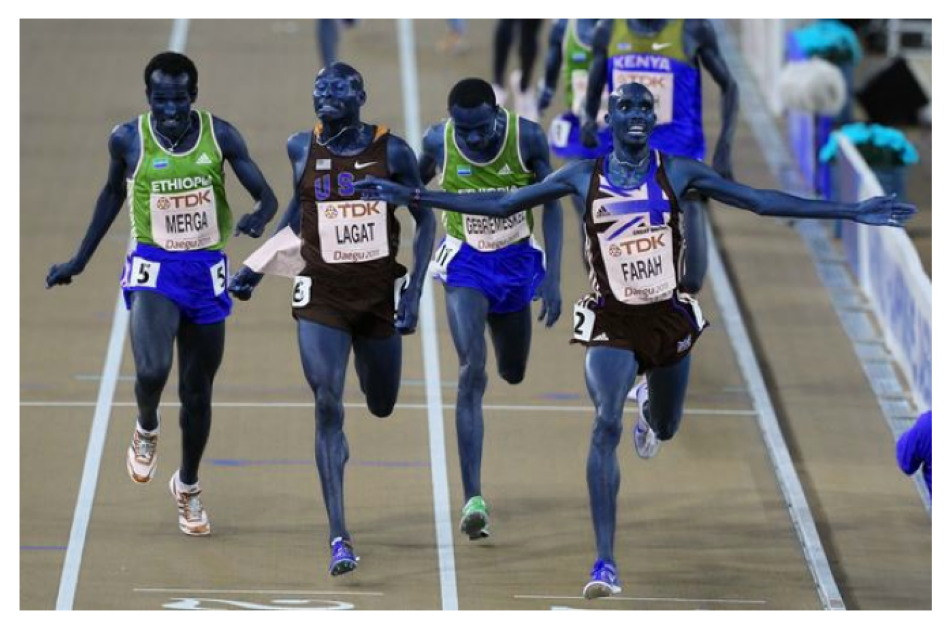

In [5]:
imagePath="/content/HOG_Images/HoGfeatures.png"
image = cv2.imread(imagePath)
print(type(image))
plt.figure(figsize=(12,10))
plt.axis("off")
plt.imshow(image)
plt.show()

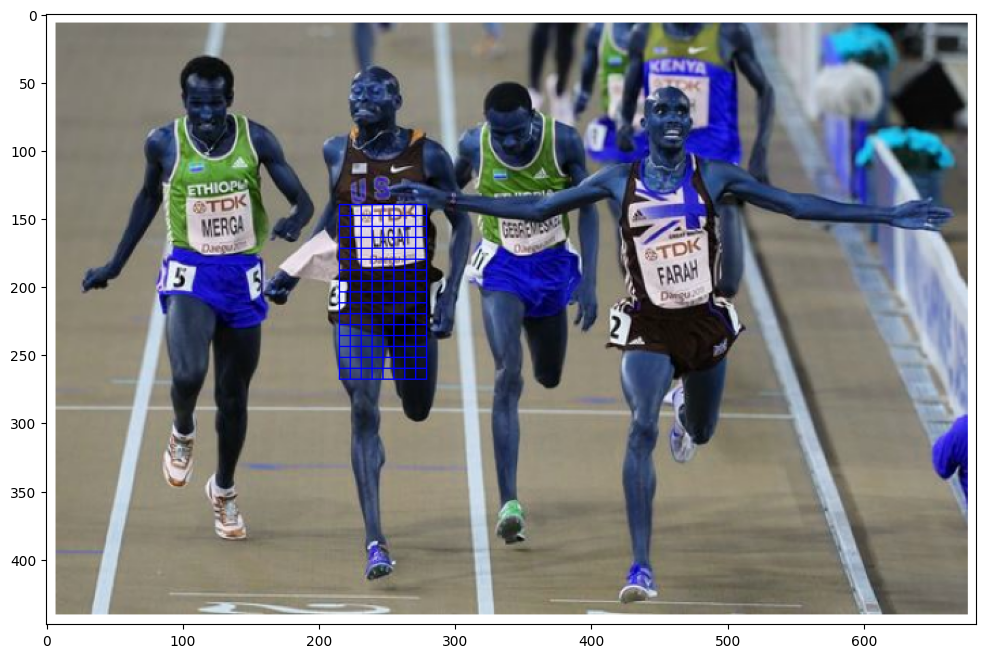

In [6]:
np_im=image.copy()
#Location=[0,0]
Location=[140,215]  # first component is vertical axis, second is horizontal axis
PatchSize=[128,64]  # first component is vertical axis, second is horizontal axis
numlinesY=int(PatchSize[0]/8)
numlinesX=int(PatchSize[1]/8)

#Draw frame around selected patch
plt.figure(figsize=(12,10))
cv2.rectangle(np_im, (Location[1], Location[0]),
                      (Location[1]+PatchSize[1],Location[0]+PatchSize[0]),
                     (0, 0, 255), 1)

#Draw region boundaries within the patch
for x in range(numlinesX):
    cv2.line(np_im,(Location[1]+8*(x+1),Location[0]),
                   (Location[1]+8*(x+1),Location[0]+PatchSize[0]),
                   (0, 0, 255), 1)
for y in range(numlinesY):
    cv2.line(np_im,(Location[1],Location[0]+8*(y+1)),
                   (Location[1]+PatchSize[1],Location[0]+8*(y+1)),
                   (0, 0, 255), 1)
plt.imshow(np_im)
plt.show()

In [7]:
np_im2=image.copy()
gx = cv2.Sobel(np_im2, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(np_im2, cv2.CV_32F, 0, 1, ksize=1)

print(gx.shape)
print(gy.shape)

(448, 683, 3)
(448, 683, 3)


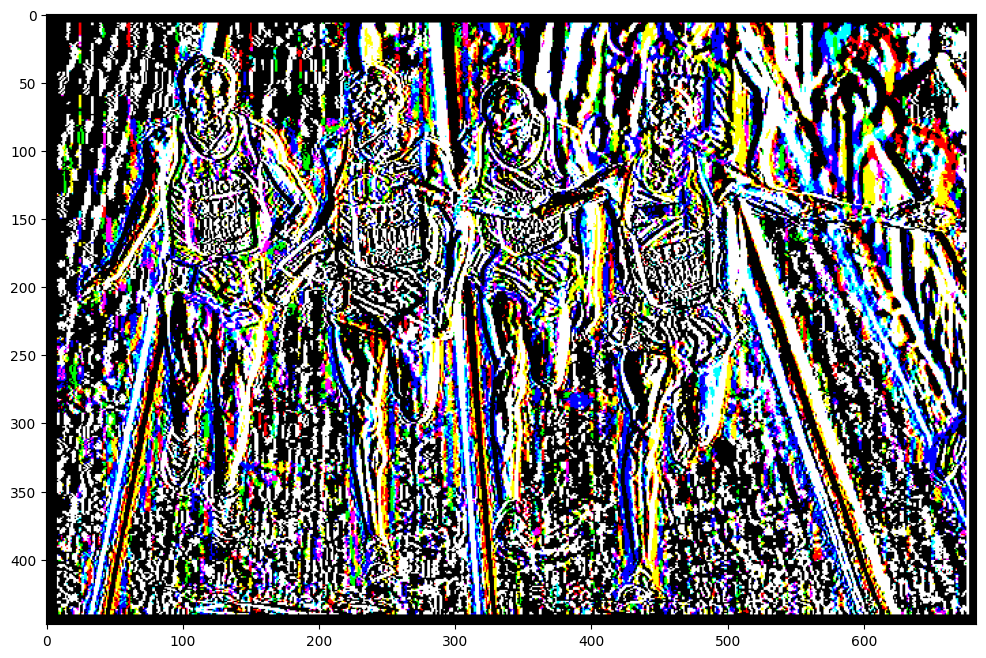

In [8]:
plt.figure(figsize=(12,10))
plt.imshow(gx,)
plt.show()

In [9]:
gx.shape

(448, 683, 3)

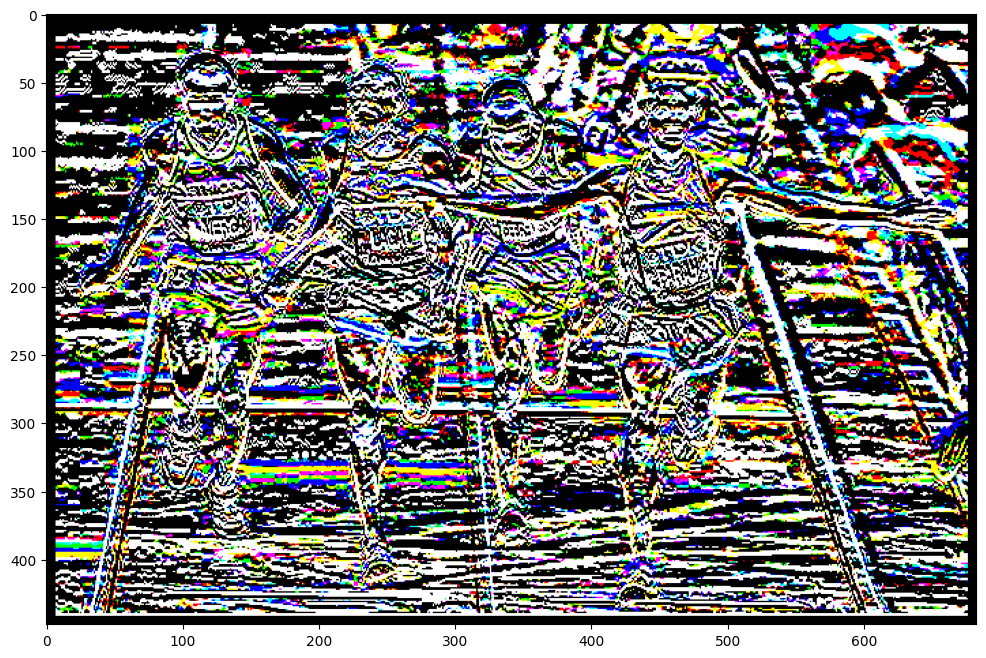

In [10]:
plt.figure(figsize=(12,10))
plt.imshow(gy)
plt.show()

In [11]:
Chan=0  # Channel to be used for visualisation
W=8     # Region-width and -height

print(np_im2[Location[0]:Location[0]+W,Location[1]:Location[1]+W,Chan])

[[16 22 29 30 31 32 35 38]
 [39 39 45 45 42 36 30 36]
 [43 49 57 56 54 51 45 37]
 [43 52 59 54 50 48 48 51]
 [45 53 59 53 47 44 43 43]
 [50 54 61 57 53 49 41 25]
 [56 50 53 54 54 50 45 55]
 [62 45 43 44 46 45 41 51]]


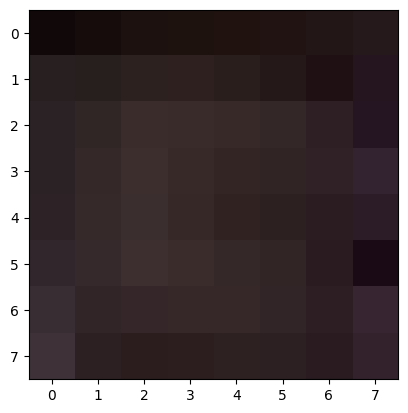

In [12]:
plt.imshow(np_im2[Location[0]:Location[0]+W,Location[1]:Location[1]+W])
plt.show()

In [13]:
print(gx[Location[0]:Location[0]+W,Location[1]:Location[1]+W,Chan])

[[  6.  13.   8.   2.   2.   4.   6.  -1.]
 [  0.   6.   6.  -3.  -9. -12.   0.   4.]
 [  3.  14.   7.  -3.  -5.  -9. -14. -10.]
 [  1.  16.   2.  -9.  -6.  -2.   3.   1.]
 [ -1.  14.   0. -12.  -9.  -4.  -1.   8.]
 [ -3.  11.   3.  -8.  -8. -12. -24.   1.]
 [-18.  -3.   4.   1.  -4.  -9.   5.  12.]
 [-34. -19.  -1.   3.   1.  -5.   6.  -6.]]


In [14]:
print(gy[Location[0]:Location[0]+W,Location[1]:Location[1]+W,Chan])

[[ -1.   1.   6.   5.   1.  -5.  -9.   2.]
 [ 27.  27.  28.  26.  23.  19.  10.  -1.]
 [  4.  13.  14.   9.   8.  12.  18.  15.]
 [  2.   4.   2.  -3.  -7.  -7.  -2.   6.]
 [  7.   2.   2.   3.   3.   1.  -7. -26.]
 [ 11.  -3.  -6.   1.   7.   6.   2.  12.]
 [ 12.  -9. -18. -13.  -7.  -4.   0.  26.]
 [  5.   3.   0.  -2.   1.  10.  10. -25.]]


In [15]:
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
print(mag.shape)
print(angle.shape)

(448, 683, 3)
(448, 683, 3)


In [16]:
mag=mag.astype(int)
angle=angle.astype(int)

In [17]:
print(mag[Location[0]:Location[0]+W,Location[1]:Location[1]+W,Chan])

[[ 6 13 10  5  2  6 10  2]
 [27 27 28 26 24 22 10  4]
 [ 5 19 15  9  9 15 22 18]
 [ 2 16  2  9  9  7  3  6]
 [ 7 14  2 12  9  4  7 27]
 [11 11  6  8 10 13 24 12]
 [21  9 18 13  8  9  5 28]
 [34 19  1  3  1 11 11 25]]


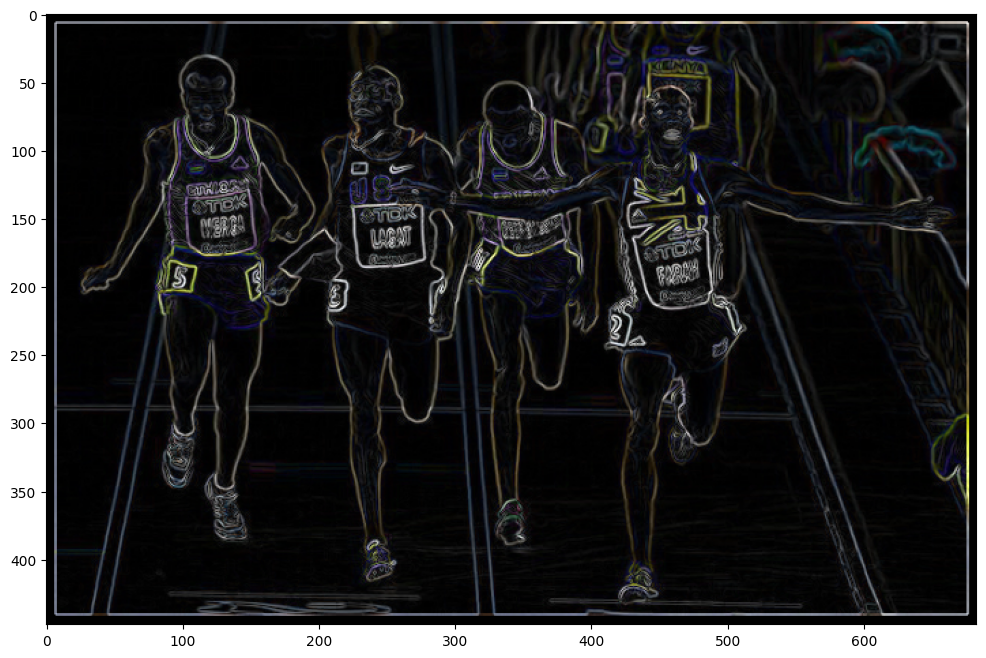

In [18]:
plt.figure(figsize=(12,10))
plt.imshow(mag)
plt.show()

In [19]:
mag.shape

(448, 683, 3)

In [20]:
maxChan=np.argmax(mag,axis=2)
print(maxChan.shape)

(448, 683)


In [21]:
print(maxChan[Location[0]:Location[0]+W,Location[1]:Location[1]+W])

[[2 0 0 2 2 2 1 2]
 [2 0 0 0 2 1 2 2]
 [2 0 0 0 0 0 1 2]
 [2 0 2 0 0 1 2 1]
 [2 0 2 2 0 1 2 2]
 [2 0 1 0 0 0 1 0]
 [2 2 0 1 0 1 2 0]
 [2 2 2 1 2 0 2 2]]


In [22]:
maxmag=np.zeros(maxChan.shape)
for r in range(maxChan.shape[0]):
    for c in range(maxChan.shape[1]):
        maxmag[r,c]=mag[r,c,maxChan[r,c]]
print(maxmag.shape)

(448, 683)


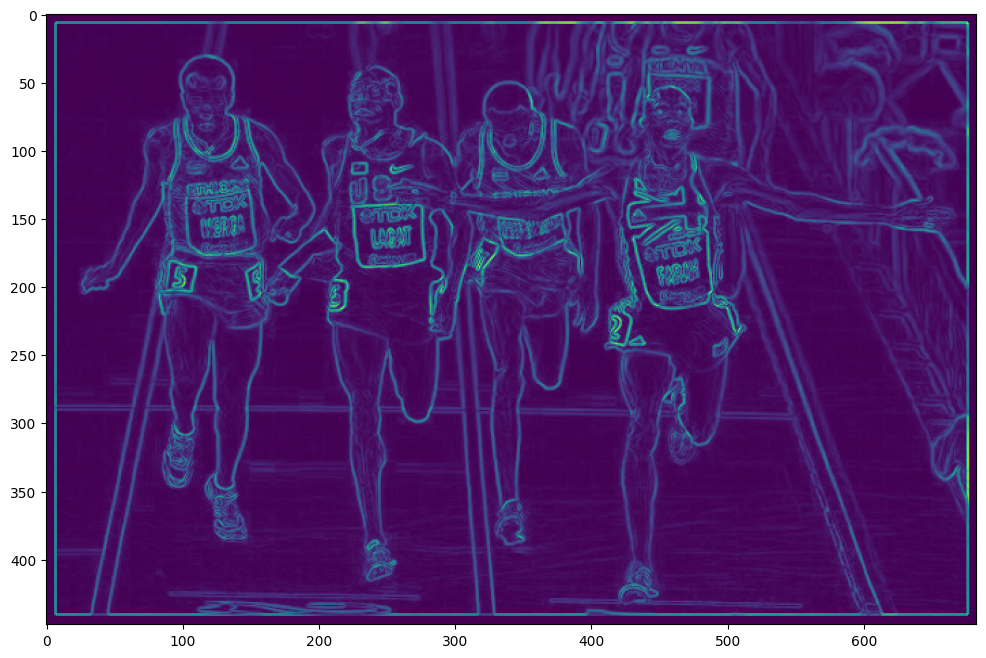

In [23]:
plt.figure(figsize=(12,10))
plt.imshow(maxmag)
plt.show()

In [24]:
maxangle=np.zeros(maxChan.shape)
for r in range(maxChan.shape[0]):
    for c in range(maxChan.shape[1]):
        maxangle[r,c]=angle[r,c,maxChan[r,c]]
print(maxangle.shape)

(448, 683)


In [25]:
print(maxmag[Location[0]:Location[0]+W,Location[1]:Location[1]+W])

[[ 8. 13. 10.  6.  4.  8. 13. 13.]
 [30. 27. 28. 26. 25. 24. 14.  9.]
 [13. 19. 15.  9.  9. 15. 24. 19.]
 [15. 16.  3.  9.  9.  8. 11.  8.]
 [17. 14.  5. 13.  9.  6.  9. 29.]
 [21. 11.  7.  8. 10. 13. 27. 12.]
 [33. 12. 18. 14.  8. 11. 10. 28.]
 [48. 26.  4.  4.  3. 11. 14. 28.]]


In [26]:
print(maxangle[Location[0]:Location[0]+W,Location[1]:Location[1]+W])

[[187.   4.  36.  90.  44. 345. 296.  81.]
 [114.  77.  77.  96. 103. 124.  65.  44.]
 [157.  42.  63. 108. 122. 126. 136. 111.]
 [172.  14. 108. 198. 229. 240. 349.  60.]
 [153.   8. 135. 162. 161. 170. 315. 293.]
 [146. 344. 293. 172. 138. 153. 175.  85.]
 [161. 218. 282. 274. 240. 206.   0.  65.]
 [175. 173. 180. 333.  33. 116.  44. 259.]]


In [27]:
def anglemapper(x):
    if x >=180:
        return x-180
    else:
        return x

In [28]:
vfunc = np.vectorize(anglemapper)
mappedAngles=(vfunc(maxangle))
print(mappedAngles[Location[0]:Location[0]+W,Location[1]:Location[1]+W])

[[  7.   4.  36.  90.  44. 165. 116.  81.]
 [114.  77.  77.  96. 103. 124.  65.  44.]
 [157.  42.  63. 108. 122. 126. 136. 111.]
 [172.  14. 108.  18.  49.  60. 169.  60.]
 [153.   8. 135. 162. 161. 170. 135. 113.]
 [146. 164. 113. 172. 138. 153. 175.  85.]
 [161.  38. 102.  94.  60.  26.   0.  65.]
 [175. 173.   0. 153.  33. 116.  44.  79.]]


In [29]:
def createHist(AngArray,MagArray,BS=20,BINS=9):
    hist=np.zeros(BINS)
    for r in range(AngArray.shape[0]):
        for c in range(AngArray.shape[1]):
            #print(AngArray[r,c])
            binel,rem = np.divmod(AngArray[r,c],BS)
            weightR=rem*1.0/BS
            weightL=1-weightR
            deltaR=MagArray[r,c]*weightR
            deltaL=MagArray[r,c]*weightL
            binL=int(binel)
            binR=np.mod(binL+1,BINS)
            hist[binL]+=deltaL
            hist[binR]+=deltaR
    return hist

In [30]:
spotAngles=mappedAngles[Location[0]:Location[0]+W,Location[1]:Location[1]+W]
spotMag=maxmag[Location[0]:Location[0]+W,Location[1]:Location[1]+W]
spotHist=createHist(spotAngles,spotMag)
print('Gradient histogram of the selected region:')
print(spotHist)

Gradient histogram of the selected region:
[146.2   42.25  67.7   89.25 119.85 116.85 131.5   77.45 151.95]


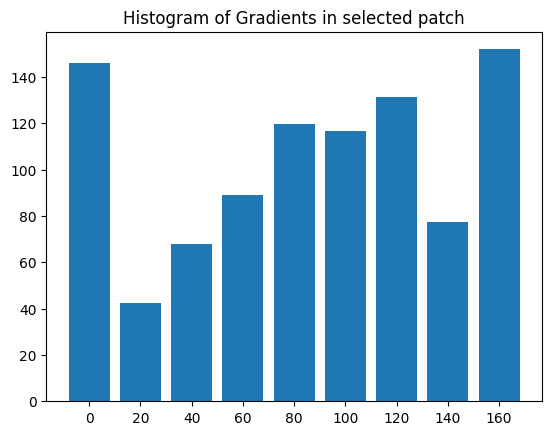

In [31]:
plt.bar(range(9),spotHist)
plt.xticks(range(9),[0,20,40,60,80,100,120,140,160])
plt.title("Histogram of Gradients in selected patch")
plt.show()

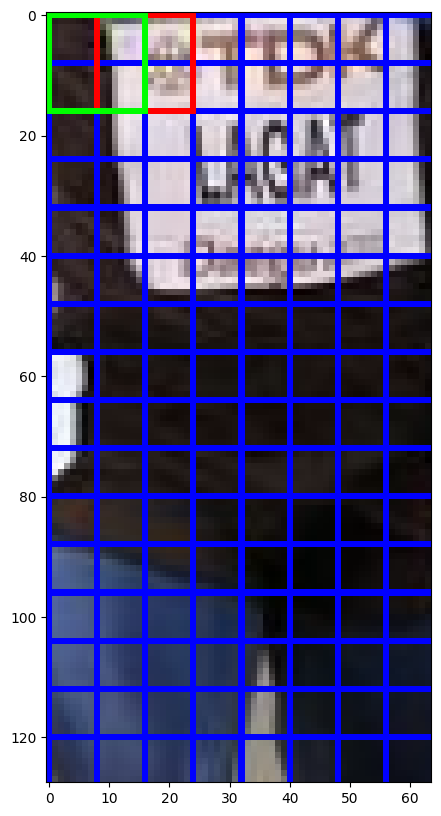

In [32]:
patch = np_im[Location[0]:Location[0]+PatchSize[0],Location[1]:Location[1]+PatchSize[1]].copy()
SR=16
plt.figure(figsize=(14,10))
cv2.rectangle(patch, (W, 0), (W+SR,SR),(255, 0, 0), 1)
cv2.rectangle(patch, (0, 0), (SR,SR),(0, 255, 0), 1)
plt.imshow(patch)
plt.show()

In [33]:
hist11=spotHist
print(hist11)
spotAngles=mappedAngles[Location[0]:Location[0]+W,Location[1]+W:Location[1]+2*W]
spotMag=maxmag[Location[0]:Location[0]+W,Location[1]+W:Location[1]+2*W]
hist12=createHist(spotAngles,spotMag)
print(hist12)
spotAngles=mappedAngles[Location[0]+W:Location[0]+2*W,Location[1]:Location[1]+W]
spotMag=maxmag[Location[0]+W:Location[0]+2*W,Location[1]:Location[1]+W]
hist21=createHist(spotAngles,spotMag)
print(hist21)
spotAngles=mappedAngles[Location[0]+W:Location[0]+2*W,Location[1]+W:Location[1]+2*W]
spotMag=maxmag[Location[0]+W:Location[0]+2*W,Location[1]+W:Location[1]+2*W]
hist22=createHist(spotAngles,spotMag)
print(hist22)

[146.2   42.25  67.7   89.25 119.85 116.85 131.5   77.45 151.95]
[1362.    423.5   250.    190.9  1063.45  756.5    39.65  210.45  941.55]
[132.   185.3   48.3   33.6   11.95  64.45 237.55 341.8  122.05]
[2640.5   112.2    35.35   25.9    44.35   46.65   66.3    74.6   674.15]


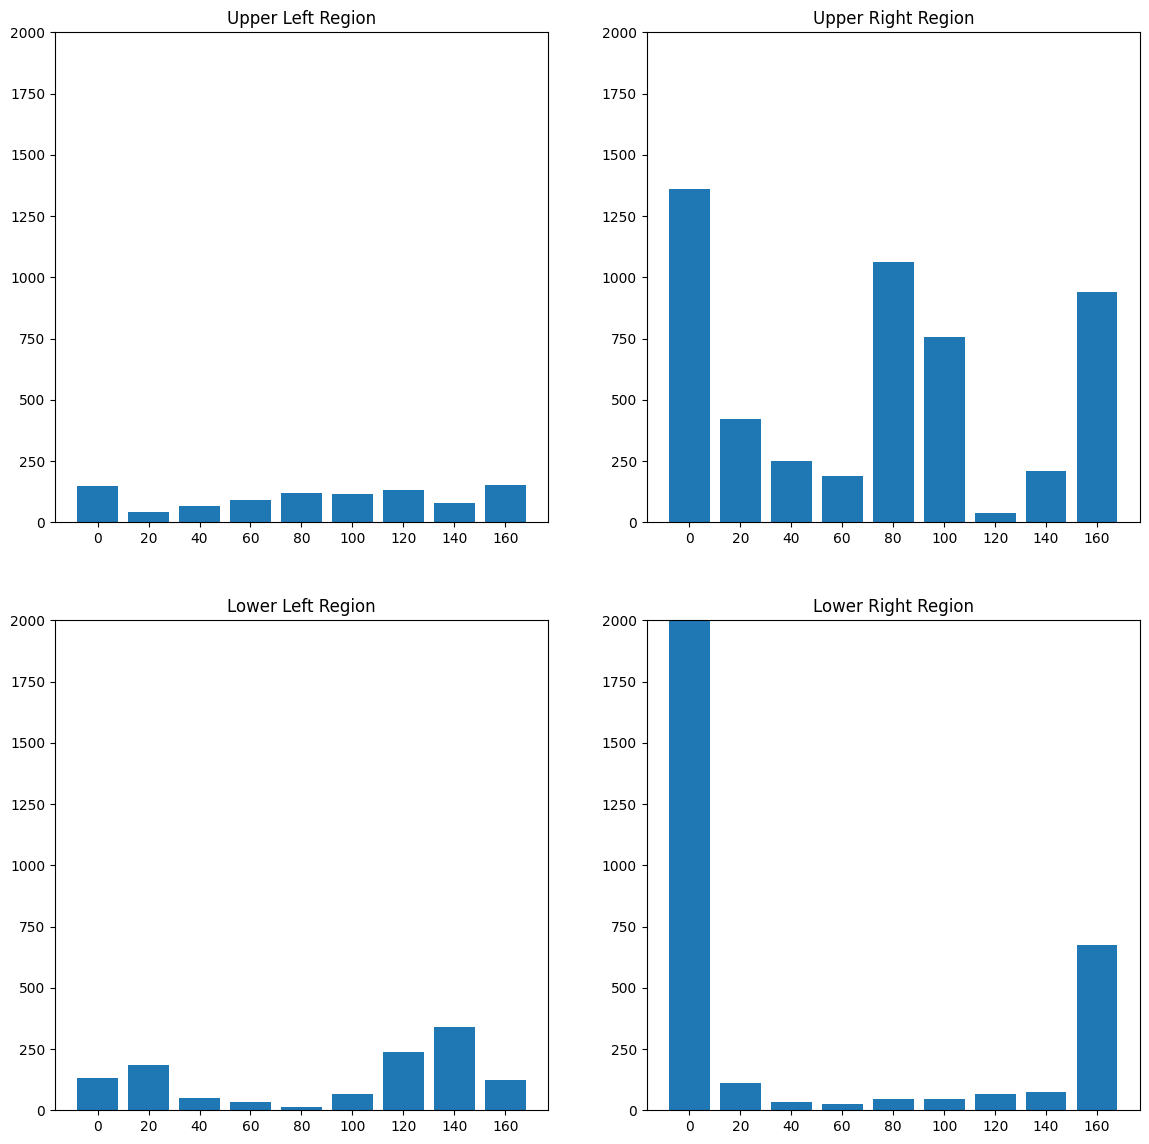

In [34]:
histList=[hist11,hist12,hist21,hist22]
titles=["Upper Left","Upper Right","Lower Left","Lower Right"]
plt.figure(figsize=(14,14))
i=1
for h in histList:
    plt.subplot(2,2,i)
    plt.title(titles[i-1]+" Region")
    plt.bar(range(9),h)
    plt.xticks(range(9),[0,20,40,60,80,100,120,140,160])
    plt.ylim((0,2000))
    i+=1
    #plt.title("Histogram of Gradients in selected patch")
plt.show()


In [35]:
histRegion=np.array([bin for hist in histList for bin in hist])
print("\nRaw Histogram of upper-left super-region:")
print(histRegion)

l2norm=np.sqrt(np.sum(histRegion**2))
print("\nL2-Norm:")
print(l2norm)
epsilon=1e-6 # define epsilon in order to prevent division by zero
histRegionNormed=histRegion/(l2norm+epsilon)
print("\nNormalized Histogram of upper-left super-region:")
print(histRegionNormed)


Raw Histogram of upper-left super-region:
[ 146.2    42.25   67.7    89.25  119.85  116.85  131.5    77.45  151.95
 1362.    423.5   250.    190.9  1063.45  756.5    39.65  210.45  941.55
  132.    185.3    48.3    33.6    11.95   64.45  237.55  341.8   122.05
 2640.5   112.2    35.35   25.9    44.35   46.65   66.3    74.6   674.15]

L2-Norm:
3547.1177771537273

Normalized Histogram of upper-left super-region:
[0.04 0.01 0.02 0.03 0.03 0.03 0.04 0.02 0.04 0.38 0.12 0.07 0.05 0.3
 0.21 0.01 0.06 0.27 0.04 0.05 0.01 0.01 0.   0.02 0.07 0.1  0.03 0.74
 0.03 0.01 0.01 0.01 0.01 0.02 0.02 0.19]


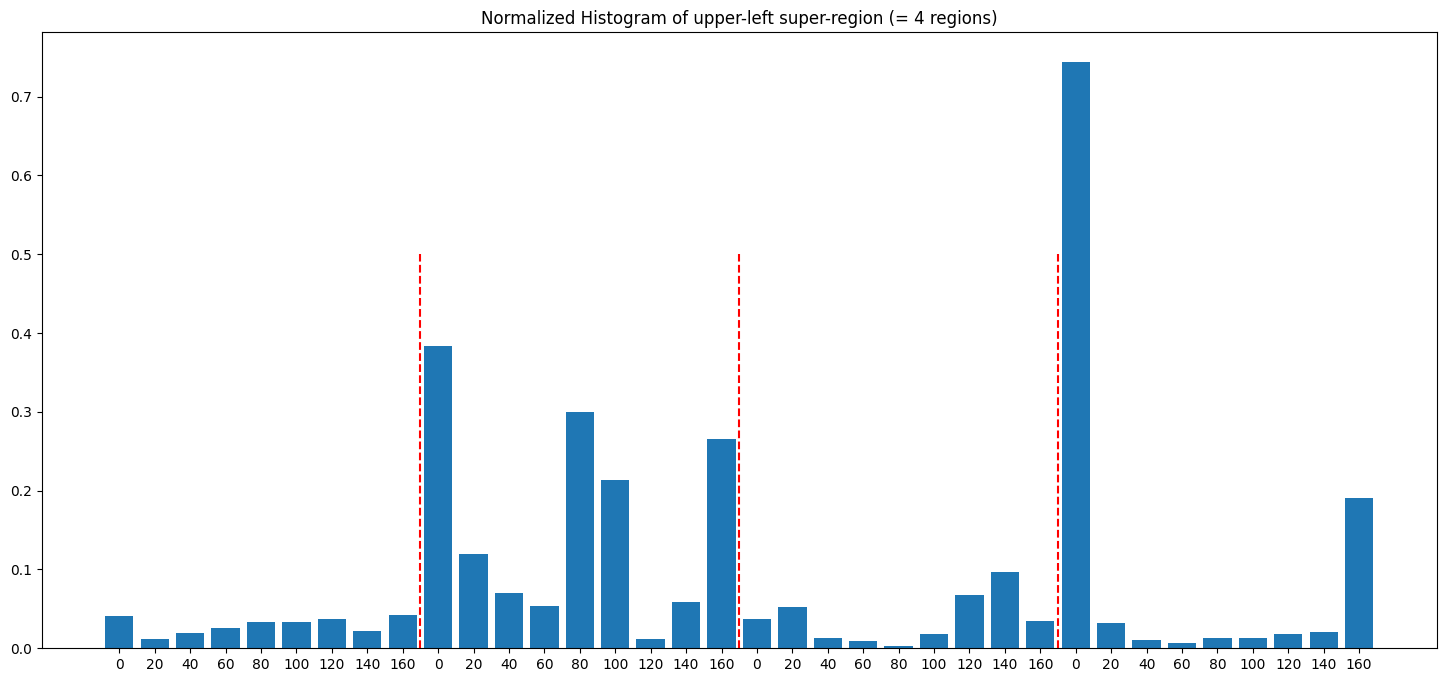

In [36]:
plt.figure(figsize=(18,8))
plt.bar(range(9*4),histRegionNormed)
plt.xticks(range(9*4),[0,20,40,60,80,100,120,140,160]*4)
for d in range(3):
    plt.plot([8.5+d*9,8.5+d*9],[0,0.5],"r--")
plt.title("Normalized Histogram of upper-left super-region (= 4 regions)")
plt.show()

In [37]:
%matplotlib inline
import cv2
import imutils
import numpy as np
from imutils.object_detection import non_max_suppression
from matplotlib import pyplot as plt

<class 'numpy.ndarray'>


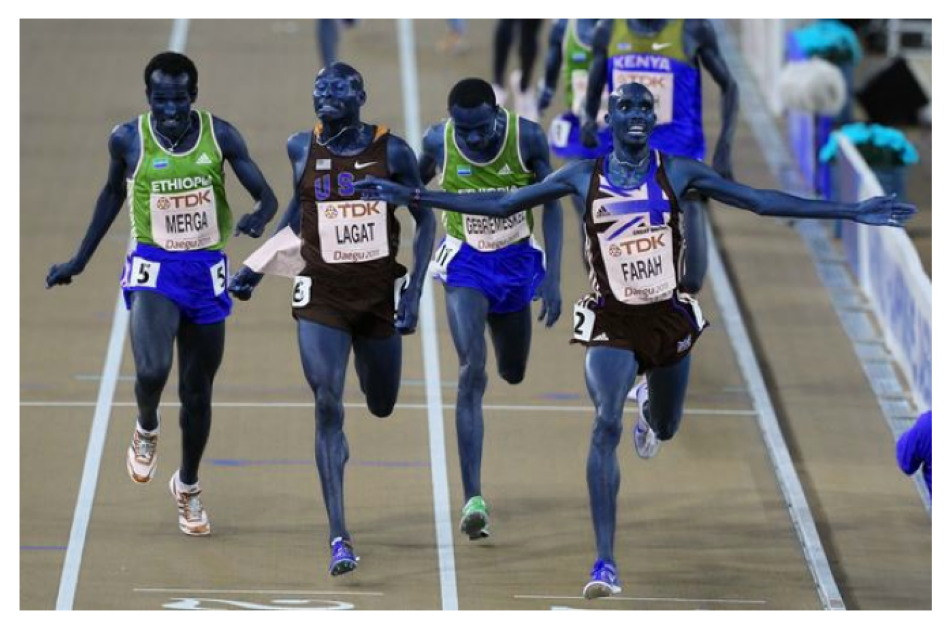

In [38]:
imagePath="/content/HOG_Images/HoGfeatures.png"
image = cv2.imread(imagePath)
print(type(image))
plt.figure(figsize=(12,10))
plt.axis("off")
plt.imshow(image)
plt.show()
#orig = image.copy()

In [39]:
hog = cv2.HOGDescriptor()
#help(cv2.HOGDescriptor())

In [40]:
winSize = (64,128) # size of the patch, for which HoG-descriptor shall be calculated
blockSize = (16,16) # size of the super-region, over which histogram are normalized
blockStride = (8,8) # step-size for shifting the super-region window
cellSize = (8,8) # size of region, for which a single histogram shall be extracted
nbins = 9 # number of bins in the histogram
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64
hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                        histogramNormType,L2HysThreshold,gammaCorrection,nlevels)

In [41]:
winStride = (16,16)
padding = (8,8)  #border around the defined patch is included into the HoG-Descriptor (provides context information)
locations = ((0,0),) #multiple locations can be defined here

#hist = hog.compute(image) #calculates hog-desciptor over entire image, with default winStride = (8,8)
#hist = hog.compute(image,winStride) #calculates hog-desciptor over entire image, with the defined winStride as shift between adjacent image patches
#hist = hog.compute(image,winStride,padding)
hist = hog.compute(image,winStride,padding,locations)

In [42]:
print(hist.shape)

(3780,)


In [43]:
print("L2-Norm of first 36 bins (4 HoGs within one super-region): {0:1.3f}".format(np.linalg.norm(hist[:36],ord=2)))
print(hist[:36])
print(np.sqrt(np.sum(hist[:36]**2)))

L2-Norm of first 36 bins (4 HoGs within one super-region): 0.998
[0.17 0.03 0.08 0.   0.35 0.   0.   0.   0.17 0.35 0.02 0.06 0.   0.2
 0.   0.   0.   0.35 0.1  0.02 0.06 0.   0.35 0.   0.   0.   0.1  0.35
 0.02 0.05 0.   0.35 0.   0.   0.   0.35]
0.99824476


In [44]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [45]:
# detect people in the image
(rects, weights) = hog.detectMultiScale(image, winStride=(4, 4),padding=(8, 8), scale=1.1)

In [46]:
print(rects)
print(weights)

[[443 186  78 156]
 [397 286  77 155]
 [378 188 122 244]
 [376  64 167 334]
 [252 121 149 298]
 [150  11 200 400]
 [ 20   4 203 406]
 [230   0 221 437]]
[0.77 0.84 0.7  0.53 0.97 0.67 1.93 0.29]


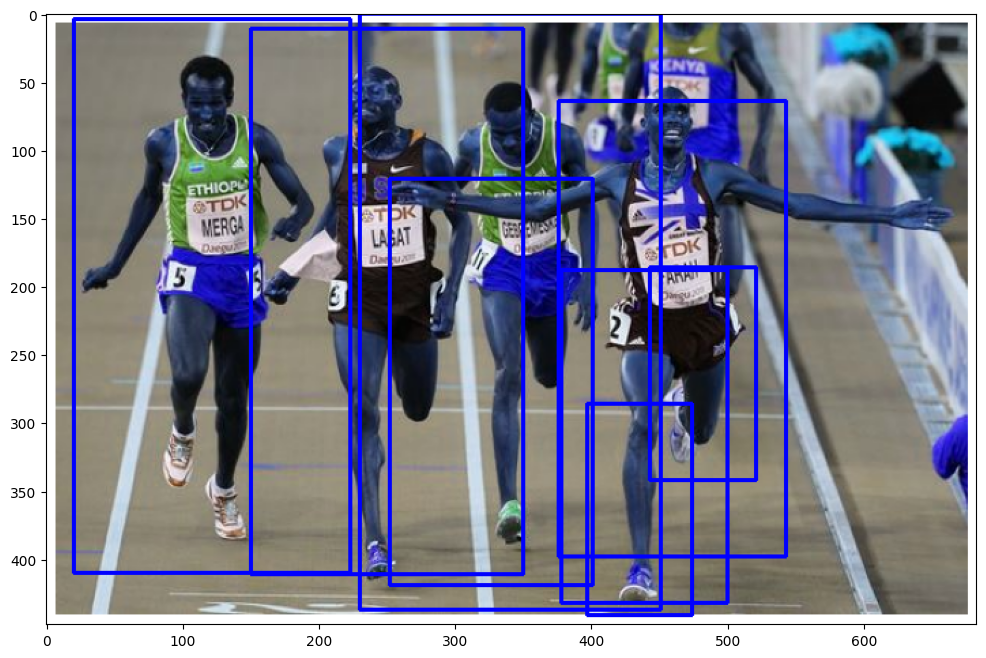

In [47]:
orig = image.copy()
# draw the original bounding boxes
for (x, y, w, h) in rects:
    cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)
plt.figure(figsize=(12,10))
plt.imshow(orig)
plt.show()

In [48]:
rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)

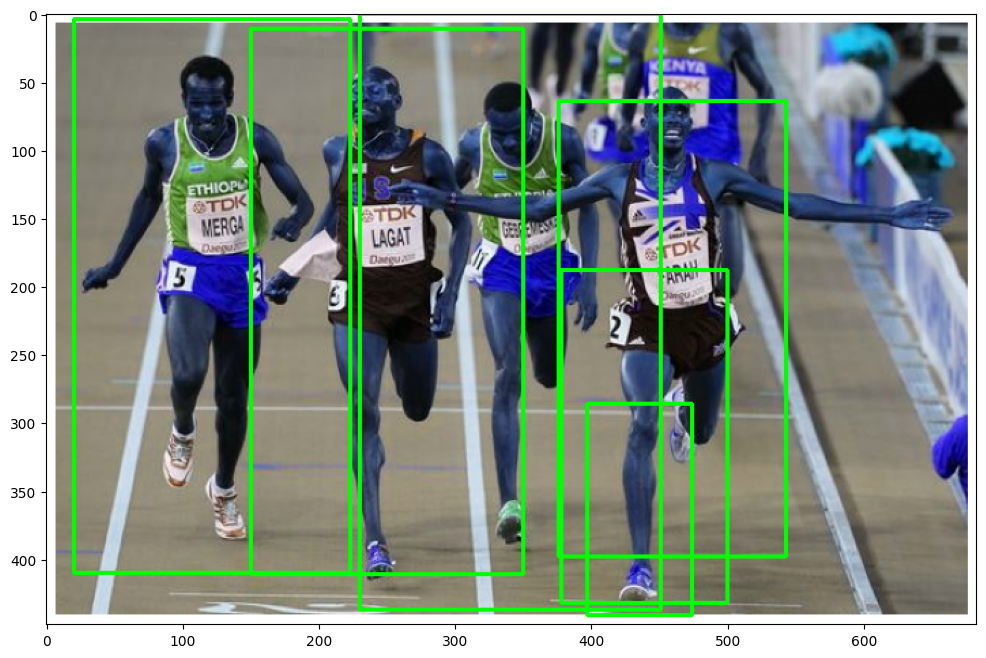

In [49]:
orig = image.copy()
plt.figure(figsize=(12,10))
# draw the final bounding boxes
for (xA, yA, xB, yB) in pick:
    cv2.rectangle(orig, (xA, yA), (xB, yB), (0, 255, 0), 2)
plt.imshow(orig)
plt.show()

In [50]:
# show some information on the number of bounding boxes
filename = imagePath[imagePath.rfind("/") + 1:]
print("[INFO] {}: {} original boxes, {} after suppression".format(filename, len(rects), len(pick)))

[INFO] HoGfeatures.png: 8 original boxes, 6 after suppression


In [54]:
file="/content/HOG_Images/street.mp4"
#file="../6p-c3.avi"
video           = cv2.VideoCapture(file)
codec           = cv2.VideoWriter_fourcc(*'XVID')
save_size       = (640, 480)
save_video_name = "street_results.avi"
fps             = 15.0
out             = cv2.VideoWriter(save_video_name, codec, fps, save_size)

print("Video Properties:")
print("\t Width     : " ,video.get(cv2.CAP_PROP_FRAME_WIDTH))
print("\t Height    : ",video.get(cv2.CAP_PROP_FRAME_HEIGHT))
#print "\t FourCC: ",video.get(cv2.CAP_PROP_FOURCC)
print("\t Framerate : ",video.get(cv2.CAP_PROP_FPS))
NofFrames = video.get(7)
print(("\t Number of Frames: ", int( NofFrames )))
frameCount=0
while True and frameCount<NofFrames:
    # img2 = video.read()[1]
    _, img2 = video.read()
    frameCount+=1
    try:
        (rects, weights) = hog.detectMultiScale(img2,winStride=(4, 4),padding=(8, 8), scale=1.15)

        # draw the original bounding boxes
        for (x, y, w, h) in rects:
            cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 0, 255), 2)

        # apply non-maxima suppression to the bounding boxes
        rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
        pick  = non_max_suppression(rects, probs=None, overlapThresh=0.65)

        # draw the final bounding boxes
        for (xA, yA, xB, yB) in pick:
            cv2.rectangle(img2, (xA, yA), (xB, yB), (0, 255, 0), 2)

        # cv2.imshow("Video",img2)
        frame_resized = cv2.resize(img2, save_size)
        out.write(frame_resized)
    except:
        print("Frame can not be displayed")
    if cv2.waitKey(33) == 27:
        break
video.release()
out.release()
cv2.destroyAllWindows()

Video Properties:
	 Width:  1920.0
	 Height:  1080.0
	 Framerate:  30.0
('\t Number of Frames: ', 443.0)
